In [1]:
import pandas as pd
import numpy as np

In [2]:
# set pandas option not to truncate row view
pd.set_option('display.max_rows', None)

In [3]:
# Step 1 - Import and manipulate data
# import flat file for 2022/2023 Premier League Season
Results_22_23 = pd.read_csv("~/UCDPA_BrianWalsh/E0_2223.csv")

In [4]:
# loop over data in file and see what is of interest
for col in Results_22_23.columns:
    print(col)

Div
Date
Time
HomeTeam
AwayTeam
FTHG
FTAG
FTR
HTHG
HTAG
HTR
Referee
HS
AS
HST
AST
HF
AF
HC
AC
HY
AY
HR
AR
B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
PSH
PSD
PSA
WHH
WHD
WHA
VCH
VCD
VCA
MaxH
MaxD
MaxA
AvgH
AvgD
AvgA
B365>2.5
B365<2.5
P>2.5
P<2.5
Max>2.5
Max<2.5
Avg>2.5
Avg<2.5
AHh
B365AHH
B365AHA
PAHH
PAHA
MaxAHH
MaxAHA
AvgAHH
AvgAHA
B365CH
B365CD
B365CA
BWCH
BWCD
BWCA
IWCH
IWCD
IWCA
PSCH
PSCD
PSCA
WHCH
WHCD
WHCA
VCCH
VCCD
VCCA
MaxCH
MaxCD
MaxCA
AvgCH
AvgCD
AvgCA
B365C>2.5
B365C<2.5
PC>2.5
PC<2.5
MaxC>2.5
MaxC<2.5
AvgC>2.5
AvgC<2.5
AHCh
B365CAHH
B365CAHA
PCAHH
PCAHA
MaxCAHH
MaxCAHA
AvgCAHH
AvgCAHA


In [5]:
# check if any missing values
Results_22_23.isna().any()

Div          False
Date         False
Time         False
HomeTeam     False
AwayTeam     False
FTHG         False
FTAG         False
FTR          False
HTHG         False
HTAG         False
HTR          False
Referee      False
HS           False
AS           False
HST          False
AST          False
HF           False
AF           False
HC           False
AC           False
HY           False
AY           False
HR           False
AR           False
B365H        False
B365D        False
B365A        False
BWH          False
BWD          False
BWA          False
IWH          False
IWD          False
IWA          False
PSH          False
PSD          False
PSA          False
WHH          False
WHD          False
WHA          False
VCH          False
VCD          False
VCA          False
MaxH         False
MaxD         False
MaxA         False
AvgH         False
AvgD         False
AvgA         False
B365>2.5     False
B365<2.5     False
P>2.5         True
P<2.5         True
Max>2.5     

In [6]:
# the columns with missing values are actually not needed but if they were I would use the following code to replace them with 0. 
Results_22_23 = Results_22_23.fillna(0)

In [7]:
# keep only necessary columns by subsetting them and saving as the same dataframe
Results_22_23 = Results_22_23[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]

In [8]:
# identify insights at this stage
Results_22_23.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.634211,1.218421,0.757895,0.563158,13.952632,11.310526,4.907895,3.894737,10.597368,10.931579,5.636842,4.471053,1.671053,1.915789,0.047368,0.026316
std,1.419944,1.183518,0.918480,0.746998,5.604170,4.941173,2.495260,2.230627,3.288020,3.463424,3.073370,2.817530,1.249677,1.358357,0.224768,0.160284
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,7.000000,5.000000,13.000000,13.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,5.000000,3.000000,33.000000,30.000000,15.000000,11.000000,23.000000,24.000000,17.000000,19.000000,6.000000,7.000000,2.000000,1.000000


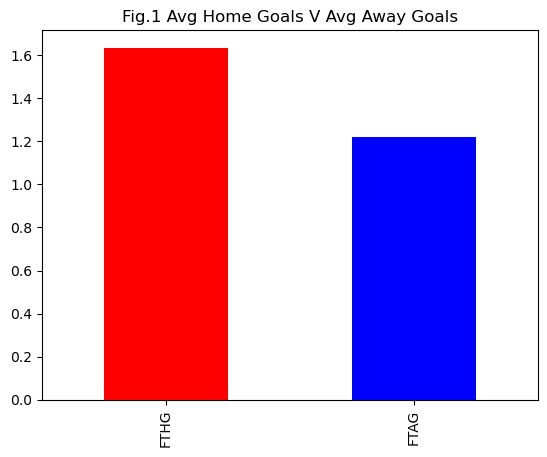

In [9]:
# graph average home goals vs away goals to show home advantage
import matplotlib.pyplot as plt
Results_22_23[['FTHG','FTAG']].mean().plot(kind='bar', title ="Fig.1 Avg Home Goals V Avg Away Goals", color=['red', 'blue'])
plt.show()

In [10]:
# Step 2 - Create League Table for 2022/2023
# from full time results (FTR) column add points for Home Team and Away Team
Results_22_23['HomeTeam_Points'] = Results_22_23['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_22_23['AwayTeam_Points'] = Results_22_23['FTR'].map({'H': 0, 'D': 1, 'A': 3})

In [11]:
# from FTR column add win, loss, draw columns
Results_22_23['home_win'] = Results_22_23['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_22_23['away_win'] = Results_22_23['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_22_23['home_loss'] = Results_22_23['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_22_23['away_loss'] = Results_22_23['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_22_23['home_draw'] = Results_22_23['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_22_23['away_draw'] = Results_22_23['FTR'].map({'H': 0, 'D': 1, 'A': 0})

In [12]:
# get data for each home club using groupby results at Home and rename columns to more recognisable terms
HT_22_23 = Results_22_23.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_22_23 = HT_22_23.reset_index()
HT_22_23.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']

In [13]:
# get data for each away club using groupby results Away and rename columns to more recognisable terms
AT_22_23 = Results_22_23.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_22_23 = AT_22_23.reset_index()
AT_22_23.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']

In [14]:
# combine both tables together and Groupby again to summarise
CT_22_23 = pd.concat([HT_22_23, AT_22_23], ignore_index=True)
CT_22_23 = CT_22_23.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_22_23 = CT_22_23.reset_index()

In [15]:
# add in columns for goal difference, position and season
CT_22_23['GD'] = CT_22_23['GF']-CT_22_23['GA']
CT_22_23['Pos'] = CT_22_23['Pts'].rank(ascending=False)
CT_22_23['Season'] = '22/23'

0     0.148398
1     0.118329
2     0.104225
3     0.146096
4     0.117647
5     0.078512
6     0.094118
7     0.079254
8     0.128205
9     0.103226
10    0.122302
11    0.123967
12    0.155887
13    0.097973
14    0.119089
15    0.103261
16    0.086331
17    0.134615
18    0.088608
19    0.075061
dtype: float64


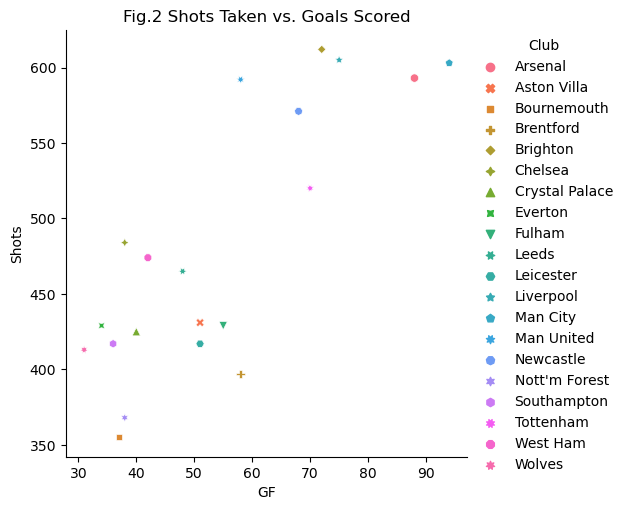

In [16]:
#correlation between shots taken and goals scored 
import seaborn as sns
sns.relplot(data=CT_22_23, x='GF', y='Shots', style='Club', hue='Club', 
            kind='scatter').set(title='Fig.2 Shots Taken vs. Goals Scored')
print(CT_22_23["GF"] / CT_22_23["Shots"])

In [17]:
#Produce final league table for 2022/2023
LT_22_23 = CT_22_23[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)
print(LT_22_23)
LT_22_23.to_csv('season_23_24_table.csv', index=False)

     Pos            Club   W   D   L  GF  GA  GD  Pts
0    1.0        Man City  28   5   5  94  33  61   89
1    2.0         Arsenal  26   6   6  88  43  45   84
2    3.0      Man United  23   6   9  58  43  15   75
3    4.0       Newcastle  19  14   5  68  33  35   71
4    5.0       Liverpool  19  10   9  75  47  28   67
5    6.0        Brighton  18   8  12  72  53  19   62
6    7.0     Aston Villa  18   7  13  51  46   5   61
7    8.0       Tottenham  18   6  14  70  63   7   60
8    9.0       Brentford  15  14   9  58  46  12   59
9   10.0          Fulham  15   7  16  55  53   2   52
10  11.0  Crystal Palace  11  12  15  40  49  -9   45
11  12.0         Chelsea  11  11  16  38  47  -9   44
12  13.0          Wolves  11   8  19  31  58 -27   41
13  14.0        West Ham  11   7  20  42  55 -13   40
14  15.0     Bournemouth  11   6  21  37  71 -34   39
15  16.0   Nott'm Forest   9  11  18  38  68 -30   38
16  17.0         Everton   8  12  18  34  57 -23   36
17  18.0       Leicester   9

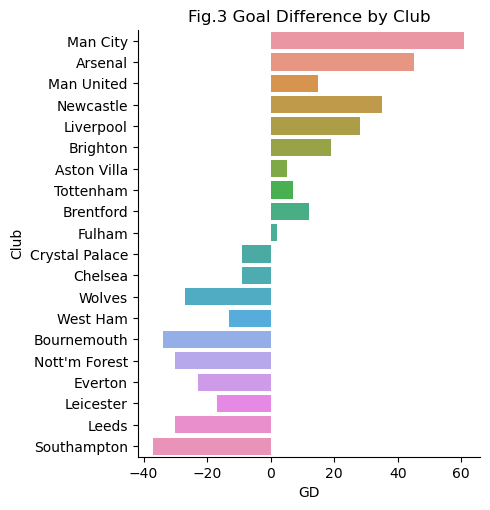

In [18]:
# visualise goal difference by club
fig = sns.catplot(x="GD", y="Club", data=LT_22_23, kind="bar").set(title='Fig.3 Goal Difference by Club')


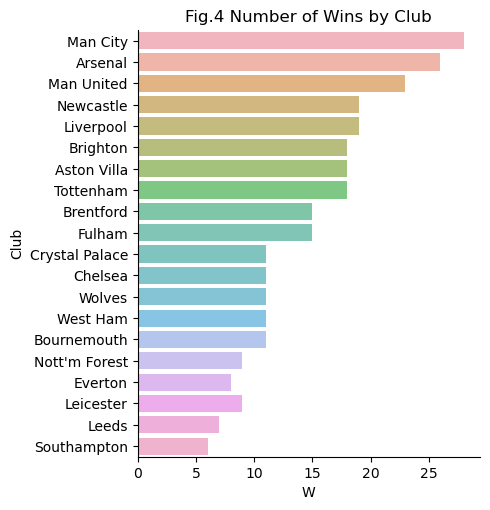

In [19]:
# visualise number of wins by each club
sns.catplot(x="W", y="Club", data=LT_22_23, kind="bar", alpha=0.7).set(title='Fig.4 Number of Wins by Club')

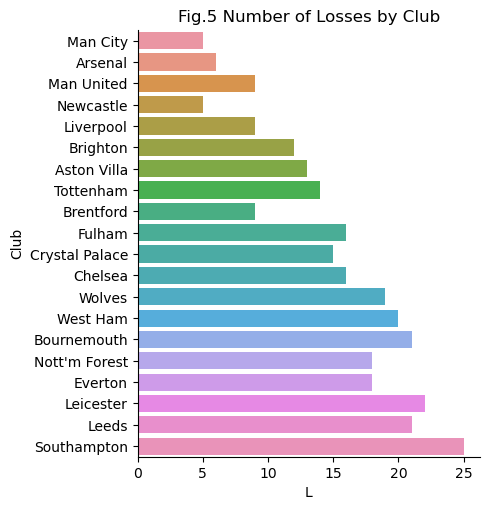

In [20]:
# visualise number of losses by club
sns.catplot(x="L", y="Club", data=LT_22_23, kind="bar").set(title='Fig.5 Number of Losses by Club')


In [21]:
# repeat code for previous seasons - 2021/2022 Season
Results_21_22 = pd.read_csv("~/UCDPA_BrianWalsh/E0_2122.csv")
Results_21_22 = Results_21_22[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_21_22['HomeTeam_Points'] = Results_21_22['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_21_22['AwayTeam_Points'] = Results_21_22['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_21_22['home_win'] = Results_21_22['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_21_22['away_win'] = Results_21_22['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_21_22['home_loss'] = Results_21_22['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_21_22['away_loss'] = Results_21_22['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_21_22['home_draw'] = Results_21_22['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_21_22['away_draw'] = Results_21_22['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_21_22 = Results_21_22.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_21_22 = HT_21_22.reset_index()
HT_21_22.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_21_22 = Results_21_22.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_21_22 = AT_21_22.reset_index()
AT_21_22.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_21_22 = pd.concat([HT_21_22, AT_21_22], ignore_index=True)
CT_21_22 = CT_21_22.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_21_22 = CT_21_22.reset_index()
CT_21_22['GD'] = CT_21_22['GF']-CT_21_22['GA']
CT_21_22['Pos'] = CT_21_22['Pts'].rank(ascending=False)
CT_21_22['Season'] = '21/22'
LT_21_22 = CT_21_22[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [22]:
# 2020/2021 Season
Results_20_21 = pd.read_csv("~/UCDPA_BrianWalsh/E0_2021.csv")
Results_20_21 = Results_20_21[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_20_21['HomeTeam_Points'] = Results_20_21['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_20_21['AwayTeam_Points'] = Results_20_21['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_20_21['home_win'] = Results_20_21['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_20_21['away_win'] = Results_20_21['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_20_21['home_loss'] = Results_20_21['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_20_21['away_loss'] = Results_20_21['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_20_21['home_draw'] = Results_20_21['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_20_21['away_draw'] = Results_20_21['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_20_21 = Results_20_21.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_20_21 = HT_20_21.reset_index()
HT_20_21.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_20_21 = Results_20_21.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_20_21 = AT_20_21.reset_index()
AT_20_21.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_20_21 = pd.concat([HT_20_21, AT_20_21], ignore_index=True)
CT_20_21 = CT_20_21.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_20_21 = CT_20_21.reset_index()
CT_20_21['GD'] = CT_20_21['GF']-CT_20_21['GA']
CT_20_21['Pos'] = CT_20_21['Pts'].rank(ascending=False)
CT_20_21['Season'] = '20/21'
LT_20_21 = CT_20_21[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [23]:
# 2019/2020 Season
Results_19_20 = pd.read_csv("~/UCDPA_BrianWalsh/E0_1920.csv")
Results_19_20 = Results_19_20[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_19_20['HomeTeam_Points'] = Results_19_20['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_19_20['AwayTeam_Points'] = Results_19_20['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_19_20['home_win'] = Results_19_20['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_19_20['away_win'] = Results_19_20['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_19_20['home_loss'] = Results_19_20['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_19_20['away_loss'] = Results_19_20['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_19_20['home_draw'] = Results_19_20['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_19_20['away_draw'] = Results_19_20['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_19_20 = Results_19_20.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_19_20 = HT_19_20.reset_index()
HT_19_20.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_19_20 = Results_19_20.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_19_20 = AT_19_20.reset_index()
AT_19_20.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_19_20 = pd.concat([HT_19_20, AT_19_20], ignore_index=True)
CT_19_20 = CT_19_20.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_19_20 = CT_19_20.reset_index()
CT_19_20['GD'] = CT_19_20['GF']-CT_19_20['GA']
CT_19_20['Pos'] = CT_19_20['Pts'].rank(ascending=False)
CT_19_20['Season'] = '19/20'
LT_19_20 = CT_19_20[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [24]:
# 2018/2019 Season
Results_18_19 = pd.read_csv("~/UCDPA_BrianWalsh/E0_1819.csv")
Results_18_19 = Results_18_19[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_18_19['HomeTeam_Points'] = Results_18_19['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_18_19['AwayTeam_Points'] = Results_18_19['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_18_19['home_win'] = Results_18_19['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_18_19['away_win'] = Results_18_19['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_18_19['home_loss'] = Results_18_19['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_18_19['away_loss'] = Results_18_19['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_18_19['home_draw'] = Results_18_19['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_18_19['away_draw'] = Results_18_19['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_18_19 = Results_18_19.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_18_19 = HT_18_19.reset_index()
HT_18_19.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_18_19 = Results_18_19.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_18_19 = AT_18_19.reset_index()
AT_18_19.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_18_19 = pd.concat([HT_18_19, AT_18_19], ignore_index=True)
CT_18_19 = CT_18_19.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_18_19 = CT_18_19.reset_index()
CT_18_19['GD'] = CT_18_19['GF']-CT_18_19['GA']
CT_18_19['Pos'] = CT_18_19['Pts'].rank(ascending=False)
CT_18_19['Season'] = '18/19'
LT_18_19 = CT_18_19[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [25]:
# 2017/2018 Season
Results_17_18 = pd.read_csv("~/UCDPA_BrianWalsh/E0_1718.csv")
Results_17_18 = Results_17_18[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_17_18['HomeTeam_Points'] = Results_17_18['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_17_18['AwayTeam_Points'] = Results_17_18['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_17_18['home_win'] = Results_17_18['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_17_18['away_win'] = Results_17_18['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_17_18['home_loss'] = Results_17_18['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_17_18['away_loss'] = Results_17_18['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_17_18['home_draw'] = Results_17_18['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_17_18['away_draw'] = Results_17_18['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_17_18 = Results_17_18.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_17_18 = HT_17_18.reset_index()
HT_17_18.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_17_18 = Results_17_18.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_17_18 = AT_17_18.reset_index()
AT_17_18.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_17_18 = pd.concat([HT_17_18, AT_17_18], ignore_index=True)
CT_17_18 = CT_17_18.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_17_18 = CT_17_18.reset_index()
CT_17_18['GD'] = CT_17_18['GF']-CT_17_18['GA']
CT_17_18['Pos'] = CT_17_18['Pts'].rank(ascending=False)
CT_17_18['Season'] = '17/18'
LT_17_18 = CT_17_18[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [26]:
# 2016/2017 Season
Results_16_17 = pd.read_csv("~/UCDPA_BrianWalsh/E0_1617.csv")
Results_16_17 = Results_16_17[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_16_17['HomeTeam_Points'] = Results_16_17['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_16_17['AwayTeam_Points'] = Results_16_17['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_16_17['home_win'] = Results_16_17['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_16_17['away_win'] = Results_16_17['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_16_17['home_loss'] = Results_16_17['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_16_17['away_loss'] = Results_16_17['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_16_17['home_draw'] = Results_16_17['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_16_17['away_draw'] = Results_16_17['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_16_17 = Results_16_17.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_16_17 = HT_16_17.reset_index()
HT_16_17.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_16_17 = Results_16_17.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_16_17 = AT_16_17.reset_index()
AT_16_17.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_16_17 = pd.concat([HT_16_17, AT_16_17], ignore_index=True)
CT_16_17 = CT_16_17.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_16_17 = CT_16_17.reset_index()
CT_16_17['GD'] = CT_16_17['GF']-CT_16_17['GA']
CT_16_17['Pos'] = CT_16_17['Pts'].rank(ascending=False)
CT_16_17['Season'] = '16/17'
LT_16_17 = CT_16_17[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [27]:
# 2015/2016 Season
Results_15_16 = pd.read_csv("~/UCDPA_BrianWalsh/E0_1516.csv")
Results_15_16 = Results_15_16[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_15_16['HomeTeam_Points'] = Results_15_16['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_15_16['AwayTeam_Points'] = Results_15_16['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_15_16['home_win'] = Results_15_16['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_15_16['away_win'] = Results_15_16['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_15_16['home_loss'] = Results_15_16['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_15_16['away_loss'] = Results_15_16['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_15_16['home_draw'] = Results_15_16['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_15_16['away_draw'] = Results_15_16['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_15_16 = Results_15_16.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_15_16 = HT_15_16.reset_index()
HT_15_16.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_15_16 = Results_15_16.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_15_16 = AT_15_16.reset_index()
AT_15_16.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_15_16 = pd.concat([HT_15_16, AT_15_16], ignore_index=True)
CT_15_16 = CT_15_16.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_15_16 = CT_15_16.reset_index()
CT_15_16['GD'] = CT_15_16['GF']-CT_15_16['GA']
CT_15_16['Pos'] = CT_15_16['Pts'].rank(ascending=False)
CT_15_16['Season'] = '15/16'
LT_15_16 = CT_15_16[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [28]:
# 2014/2015 Season
Results_14_15 = pd.read_csv("~/UCDPA_BrianWalsh/E0_1415.csv")
Results_14_15 = Results_14_15[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
                               'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
Results_14_15['HomeTeam_Points'] = Results_14_15['FTR'].map({'H': 3, 'D': 1, 'A': 0})
Results_14_15['AwayTeam_Points'] = Results_14_15['FTR'].map({'H': 0, 'D': 1, 'A': 3})
Results_14_15['home_win'] = Results_14_15['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_14_15['away_win'] = Results_14_15['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_14_15['home_loss'] = Results_14_15['FTR'].map({'H': 0, 'D': 0, 'A': 1})
Results_14_15['away_loss'] = Results_14_15['FTR'].map({'H': 1, 'D': 0, 'A': 0})
Results_14_15['home_draw'] = Results_14_15['FTR'].map({'H': 0, 'D': 1, 'A': 0})
Results_14_15['away_draw'] = Results_14_15['FTR'].map({'H': 0, 'D': 1, 'A': 0})
HT_14_15 = Results_14_15.groupby('HomeTeam').agg({'HomeTeam_Points':'sum','FTHG':'sum', 'FTAG':'sum', 'HS':'sum', 
                                                  'HST':'sum', 'HC':'sum', 'HF':'sum', 'HY':'sum', 'HR':'sum', 
                                                  'home_win':'sum', 'home_loss':'sum', 'home_draw':'sum'})
HT_14_15 = HT_14_15.reset_index()
HT_14_15.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
AT_14_15 = Results_14_15.groupby('AwayTeam').agg({'AwayTeam_Points':'sum','FTAG':'sum', 'FTHG':'sum', 'AS':'sum', 
                                                  'AST':'sum', 'AC':'sum', 'AF':'sum', 'AY':'sum', 'AR':'sum', 
                                                  'away_win':'sum', 'away_loss':'sum', 'away_draw':'sum'})
AT_14_15 = AT_14_15.reset_index()
AT_14_15.columns = ['Club', 'Pts', 'GF', 'GA', 'Shots', 'SoT', 'Corners', 'Fouls', 'YC', 'RC', 'W', 'L', 'D']
CT_14_15 = pd.concat([HT_14_15, AT_14_15], ignore_index=True)
CT_14_15 = CT_14_15.groupby('Club').agg({'Pts':'sum','GF':'sum', 'GA':'sum', 'Shots':'sum', 'SoT':'sum', 
                                         'Corners':'sum', 'Fouls':'sum', 'YC':'sum', 'RC':'sum', 'W':'sum', 
                                         'L':'sum', 'D':'sum'})
CT_14_15 = CT_14_15.reset_index()
CT_14_15['GD'] = CT_14_15['GF']-CT_14_15['GA']
CT_14_15['Pos'] = CT_14_15['Pts'].rank(ascending=False)
CT_14_15['Season'] = '14/15'
LT_14_15 = CT_14_15[['Pos', 'Club', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']].sort_values(by=['Pos', 'GD'], ascending=[True, False], ignore_index=True)

In [29]:
# combine table for last 9 years
All_years = pd.concat([CT_14_15,CT_15_16,CT_16_17,CT_17_18,CT_18_19, CT_19_20, CT_20_21, CT_21_22, CT_22_23], ignore_index=True)

In [30]:
# extract Man City data only by subsetting rows
Man_City_all_years = All_years[All_years["Club"] == "Man City"] 
print(Man_City_all_years['Pts'].agg([max, min, np.mean]))

max     100.000000
min      66.000000
mean     85.555556
Name: Pts, dtype: float64


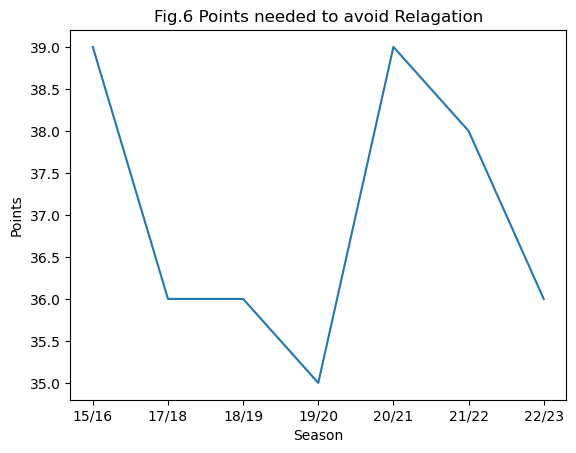

max     39.0
min     35.0
mean    37.0
Name: Pts, dtype: float64


In [32]:
# identify points required to avoid relegation
Survival = All_years[All_years["Pos"] == 17]
fig, ax = plt.subplots()
ax.plot(Survival["Season"], Survival["Pts"])
ax.set_title("Fig.6 Points needed to avoid Relagation")
ax.set_ylabel("Points")
ax.set_xlabel("Season")
plt.show()
print(Survival['Pts'].agg([max, min, np.mean]))

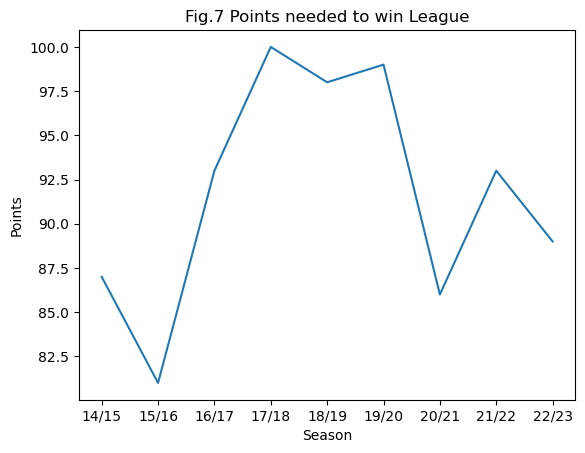

max     100.000000
min      81.000000
mean     91.777778
Name: Pts, dtype: float64


In [33]:
# look at points needed to win premier league
Points_to_win = All_years[All_years["Pos"] == 1]
fig, ax = plt.subplots()
ax.plot(Points_to_win["Season"], Points_to_win["Pts"])
ax.set_title("Fig.7 Points needed to win League")
ax.set_ylabel("Points")
ax.set_xlabel("Season")
plt.show()
print(Points_to_win['Pts'].agg([max, min, np.mean]))

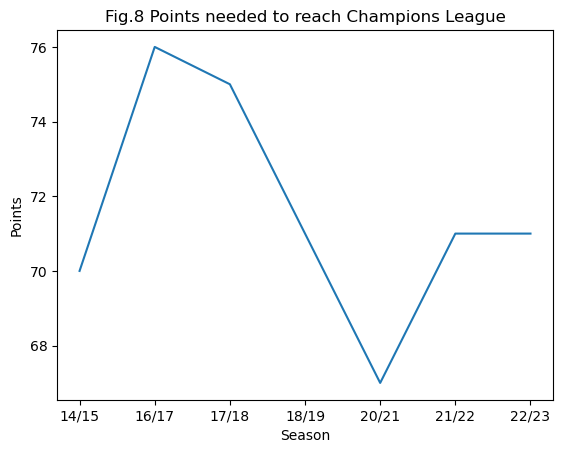

max     76.000000
min     67.000000
mean    71.571429
Name: Pts, dtype: float64


In [34]:
# look at points needed to finish top four
Points_to_win = All_years[All_years["Pos"] == 4]
fig, ax = plt.subplots()
ax.plot(Points_to_win["Season"], Points_to_win["Pts"])
ax.set_title("Fig.8 Points needed to reach Champions League")
ax.set_ylabel("Points")
ax.set_xlabel("Season")
plt.show()
print(Points_to_win['Pts'].agg([max, min, np.mean]))

In [35]:
# Step 3 - look at referees' performances
# select relevant columns
Referees = Results_22_23[['Referee', 'HF', 'AF', 'HY', 'AY', 'HR','AR']].copy()

# add columns for sum of fouls, yellow cards and red cards
Referees['Fouls'] = Referees.iloc[:,1:3].sum(axis=1)
Referees['Yel'] = Referees.iloc[:, 3:5].sum(axis=1)
Referees['Red'] = Referees.iloc[:, 5:7].sum(axis=1)

In [36]:
# summarise referees using groupby. To get a count of number of games for each referee I am using count for 
# HF column and then renaming it 
Referees_stats = Referees.groupby('Referee').agg({'HF':'count', 'Fouls':'sum', 'Red':'sum', 'Yel':'sum'})
Referees_stats = Referees_stats.reset_index()
Referees_stats.rename(columns = {'HF':'Games'}, inplace=True)

# creating per game columns to direclty compare referees as the have participated in different number of games
Referees_stats['Fouls P/G'] = Referees_stats['Fouls'] / Referees_stats['Games']
Referees_stats['Yel P/G'] = Referees_stats['Yel'] / Referees_stats['Games']
Referees_stats['Red P/G'] = Referees_stats['Red'] / Referees_stats['Games']

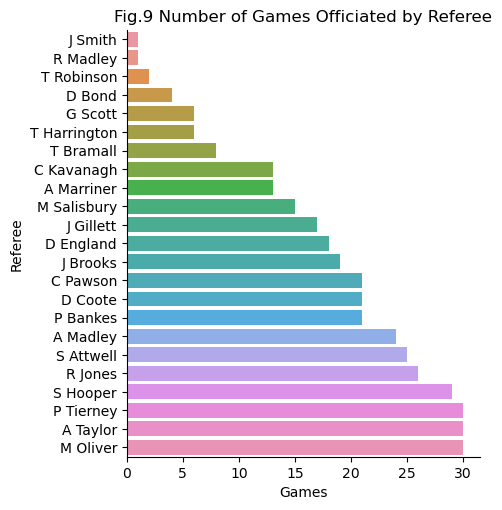

In [37]:
# visualise Number of Games Officiated by Referee
Referees_stats = Referees_stats.sort_values(by="Games")
sns.catplot(x="Games", y="Referee", data=Referees_stats, kind="bar").set(title='Fig.9 Number of Games Officiated by Referee')

/tmp/ipykernel_15171/2392002592.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Referees_stats["Referee"], rotation=90)


[Text(0, 0, 'J Smith'),
 Text(1, 0, 'R Madley'),
 Text(2, 0, 'T Robinson'),
 Text(3, 0, 'D Bond'),
 Text(4, 0, 'G Scott'),
 Text(5, 0, 'T Harrington'),
 Text(6, 0, 'T Bramall'),
 Text(7, 0, 'C Kavanagh'),
 Text(8, 0, 'A Marriner'),
 Text(9, 0, 'M Salisbury'),
 Text(10, 0, 'J Gillett'),
 Text(11, 0, 'D England'),
 Text(12, 0, 'J Brooks'),
 Text(13, 0, 'C Pawson'),
 Text(14, 0, 'D Coote'),
 Text(15, 0, 'P Bankes'),
 Text(16, 0, 'A Madley'),
 Text(17, 0, 'S Attwell'),
 Text(18, 0, 'R Jones'),
 Text(19, 0, 'S Hooper'),
 Text(20, 0, 'P Tierney'),
 Text(21, 0, 'A Taylor'),
 Text(22, 0, 'M Oliver')]

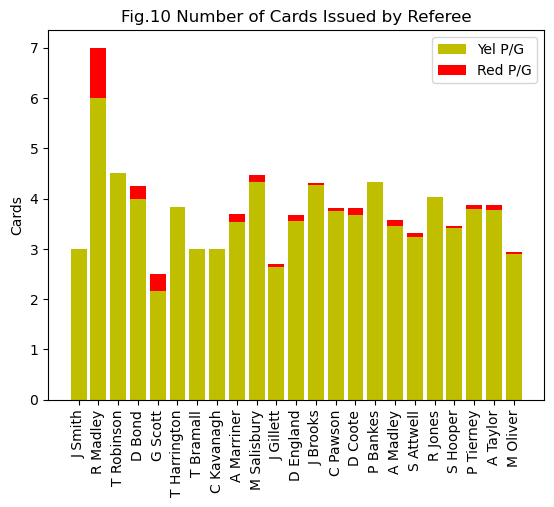

In [38]:
# cards issued by referees per game
fig, ax = plt.subplots()
ax.bar(Referees_stats["Referee"], Referees_stats["Yel P/G"], label="Yel P/G", color='y')
ax.bar(Referees_stats["Referee"], Referees_stats["Red P/G"], bottom=Referees_stats["Yel P/G"], label="Red P/G", color='r')
ax.set_ylabel("Cards")
ax.set_title("Fig.10 Number of Cards Issued by Referee")
ax.legend()
ax.set_xticklabels(Referees_stats["Referee"], rotation=90)

In [39]:
# Step 4 - Look at Current Season
# extract Arsenal, Man United, Newcastle (Top Four)
Arsenal_all_years = All_years[All_years["Club"] == "Arsenal"] 
Man_Utd_all_years = All_years[All_years["Club"] == "Man United"]
Newcastle_all_years = All_years[All_years["Club"] == "Newcastle"]

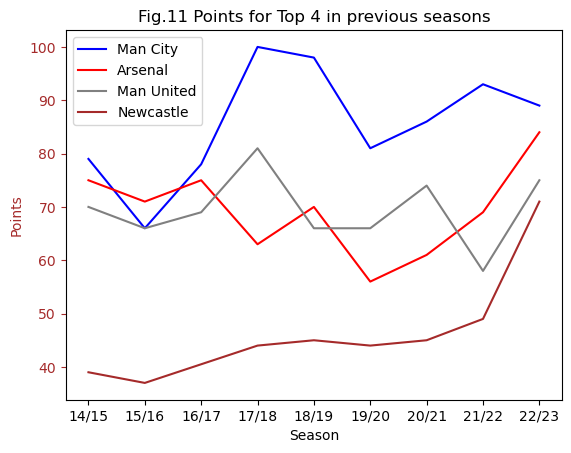

In [40]:
# forward trend
def plot_seasons(x, y, color, label, xlabel, ylabel, title):

# plot the inputs x,y in the provided color
    ax.plot(x, y, color=color, label=label)

# set the x-axis label
    ax.set_xlabel(xlabel)

# set the y-axis label
    ax.set_ylabel(ylabel, color=color)
    
# set the title
    ax.set_title(title)

# set the colors tick params for y-axis
    ax.tick_params('y', colors=color)    
    
fig, ax = plt.subplots()
plot_seasons(Man_City_all_years['Season'], Man_City_all_years['Pts'], "blue", "Man City", 'Season', 'Points', 
             'Fig.11 Points for Top 4 in previous seasons')
plot_seasons(Arsenal_all_years['Season'], Arsenal_all_years['Pts'], "red", "Arsenal", 'Season', 'Points', 
             'Fig.11 Points for Top 4 in previous seasons')
plot_seasons(Man_Utd_all_years['Season'], Man_Utd_all_years['Pts'], "gray", "Man United", 'Season', 'Points', 
             'Fig.11 Points for Top 4 in previous seasons')
plot_seasons(Newcastle_all_years['Season'], Newcastle_all_years['Pts'], "brown", "Newcastle", 'Season', 'Points', 
             'Fig.11 Points for Top 4 in previous seasons')
ax.legend()
plt.show()

In [41]:
# use webscraping to pull in league table using BeautifulSoup 
import requests
from bs4 import BeautifulSoup as bs
Currentseason = requests.get('https://www.bbc.com/sport/football/tables')
Table_23_24 = bs(Currentseason.content, 'lxml')
table = Table_23_24.find("table", {"class":"gs-o-table"})

In [42]:
# convert to df and clean up data
LT_23_24 = pd.read_html(str(table))[0]
LT_23_24 = LT_23_24.iloc[:-1 , :]
LT_23_24.columns = ['Pos', 'NA', 'Club', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts', 'Form']
LT_23_24 = LT_23_24[["Pos", "Club", "P", "W", "D", "L", "F", "A", "GD", "Pts"]]
print(LT_23_24)

   Pos            Club  P  W  D  L  F  A  GD Pts
0    1        Brighton  2  2  0  0  8  2   6   6
1    2        Man City  2  2  0  0  4  0   4   6
2    3         Arsenal  2  2  0  0  3  1   2   6
3    4       Brentford  2  1  1  0  5  2   3   4
4    5       Liverpool  2  1  1  0  4  2   2   4
5    6       Tottenham  2  1  1  0  4  2   2   4
6    7        West Ham  2  1  1  0  4  2   2   4
7    8       Newcastle  2  1  0  1  5  2   3   3
8    9     Aston Villa  2  1  0  1  5  5   0   3
9   10    Nottm Forest  2  1  0  1  3  3   0   3
10  11  Crystal Palace  2  1  0  1  1  1   0   3
11  12         Man Utd  2  1  0  1  1  2  -1   3
12  13          Fulham  2  1  0  1  1  3  -2   3
13  14     Bournemouth  2  0  1  1  2  4  -2   1
14  15         Chelsea  2  0  1  1  2  4  -2   1
15  16       Sheff Utd  2  0  0  2  1  3  -2   0
16  17           Luton  1  0  0  1  1  4  -3   0
17  18         Burnley  1  0  0  1  0  3  -3   0
18  19          Wolves  2  0  0  2  1  5  -4   0
19  20         Evert

In [43]:
# now we want to add the name of each club's stadium and pull in their location and capacity using webscraping
# first create dict to set out each club's stadium
Stadiums = {'Club':["Brighton", "Man City", "Arsenal", "Brentford", "Liverpool", "Tottenham", "West Ham", 
                      "Newcastle", "Aston Villa", "Nottm Forest", "Crystal Palace", "Man Utd", "Fulham", 
                      "Bournemouth", "Chelsea", "Sheff Utd", "Luton", "Burnley", "Wolves", "Everton"], 
            'Stadium':["Falmer Stadium", "Etihad Stadium", "Emirates Stadium", "Gtech Community Stadium", 
                         "Anfield", "Tottenham Hotspur Stadium", "London Stadium", "St James' Park", "Villa Park", 
                         "City Ground", "Selhurst Park", "Old Trafford", "Craven Cottage", "Dean Court", 
                         "Stamford Bridge", "Bramall Lane", "Kenilworth Road", "Turf Moor", "Molineux", 
                         "Goodison Park"]}

# convert to dataframe
Stadiums = pd.DataFrame(Stadiums)

In [44]:
# use webscraping to pull in table listing stadium location and capacity
Stadiumsinfo = requests.get('https://simple.wikipedia.org/wiki/List_of_English_football_stadiums_by_capacity')
Stadium_Capacity = bs(Stadiumsinfo.content, 'lxml')
table = Stadium_Capacity.find_all('table')
Stadium_info = pd.read_html(str(table))[0]
Stadium_info['Capacity'] = Stadium_info['Capacity'].str[:6]
Stadium_info = Stadium_info[["Stadium", "Town / City", "Capacity"]]

In [45]:
# use left join to merge Stadiums df to Stadium_info df to return all records in primary file
Stadiums = Stadiums.merge(Stadium_info, on='Stadium', how='left')
# check for missing values
Stadiums.isna().sum()

Club           0
Stadium        0
Town / City    1
Capacity       1
dtype: int64

In [46]:
# print Stadiums to identify missing values
print(Stadiums)

              Club                    Stadium          Town / City Capacity
0         Brighton             Falmer Stadium             Brighton   30,750
1         Man City             Etihad Stadium           Manchester   55,097
2          Arsenal           Emirates Stadium               London   60,704
3        Brentford    Gtech Community Stadium                  NaN      NaN
4        Liverpool                    Anfield            Liverpool   54,074
5        Tottenham  Tottenham Hotspur Stadium               London   62,062
6         West Ham             London Stadium               London   62,500
7        Newcastle             St James' Park  Newcastle upon Tyne   52,338
8      Aston Villa                 Villa Park           Birmingham   42,660
9     Nottm Forest                City Ground           Nottingham   30,576
10  Crystal Palace              Selhurst Park               London    26074
11         Man Utd               Old Trafford           Manchester   75,653
12          

In [47]:
# fill in missing values for Brentford
Stadiums.at[3, 'Town / City'] = "London"
Stadiums.at[3, 'Capacity'] = "17,500"

In [48]:
# merge with League Table using left join again to ensure we get all clubs in the League Table
LT_23_24 = LT_23_24.merge(Stadiums, on='Club', how='left')
print(LT_23_24)



   Pos            Club  P  W  D  L  F  A  GD Pts                    Stadium  \
0    1        Brighton  2  2  0  0  8  2   6   6             Falmer Stadium   
1    2        Man City  2  2  0  0  4  0   4   6             Etihad Stadium   
2    3         Arsenal  2  2  0  0  3  1   2   6           Emirates Stadium   
3    4       Brentford  2  1  1  0  5  2   3   4    Gtech Community Stadium   
4    5       Liverpool  2  1  1  0  4  2   2   4                    Anfield   
5    6       Tottenham  2  1  1  0  4  2   2   4  Tottenham Hotspur Stadium   
6    7        West Ham  2  1  1  0  4  2   2   4             London Stadium   
7    8       Newcastle  2  1  0  1  5  2   3   3             St James' Park   
8    9     Aston Villa  2  1  0  1  5  5   0   3                 Villa Park   
9   10    Nottm Forest  2  1  0  1  3  3   0   3                City Ground   
10  11  Crystal Palace  2  1  0  1  1  1   0   3              Selhurst Park   
11  12         Man Utd  2  1  0  1  1  2  -1   3    

In [49]:
LT_23_24.to_csv('season_23_24_table.csv', index=False)
